In [1]:
import numpy as np
import matplotlib.pyplot as plt
from CTRNNclass import *
from pyloricfitness import *
from acceptance import *

In [2]:
duration = 250
dt = .01
n = 3
initial_states = np.array([3.,3.,3.])

superevol0
neurongenome = wholegenome[:(n**2+(2*n))]
HPgenome = [.25,.25,.25,.75,.75,.75,40,20,1]

In [3]:
#HPgenome = [ 0.82124269 , 0.58735959 , 0.36017884 , 0.4801099,   0.43715521 , 0.18976905, 38.1451649 , 14.92113071, 26.        ]
acceptance(HPgenome,neurongenome)

0

HP mech: [ 0.35847261  0.20945884  0.34201794  0.36847261  0.21945883  0.82836489
 39.9910632  19.0137781  40.        ]
magnitude= 0.3
CTRNN params: [-1.65247284  6.68811561 -0.08235413  0.81266005  9.46377475  5.62906747
 -5.92559875 -5.97209152  5.93559917  3.41248804 -3.03746214 -4.5715482
  7.37470557  9.79376709  2.56164698]
0.7366636903094091


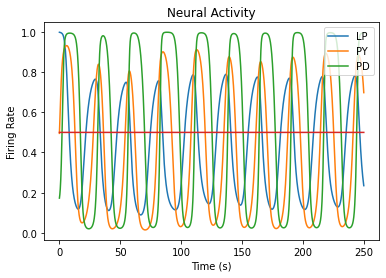

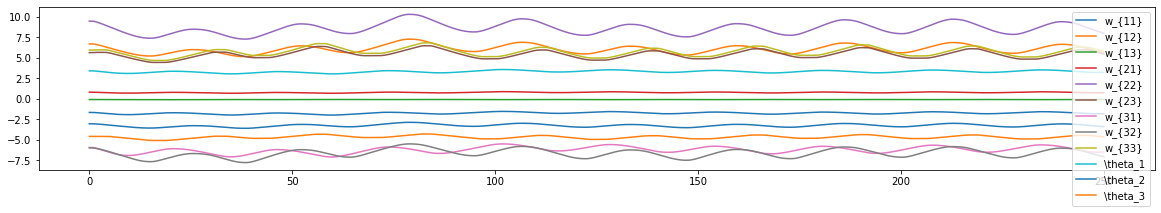

magnitude= 0.6
CTRNN params: [-1.47120981  6.31128372 -0.33497365  0.63446354  9.2411929   4.99608961
 -5.93232146 -6.21363856  5.63019175  3.73810503 -3.26455696 -4.80853346
  7.37470557  9.79376709  2.56164698]
0.733971957101744


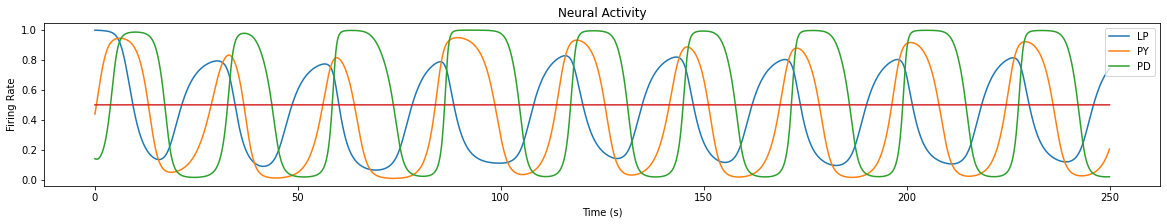

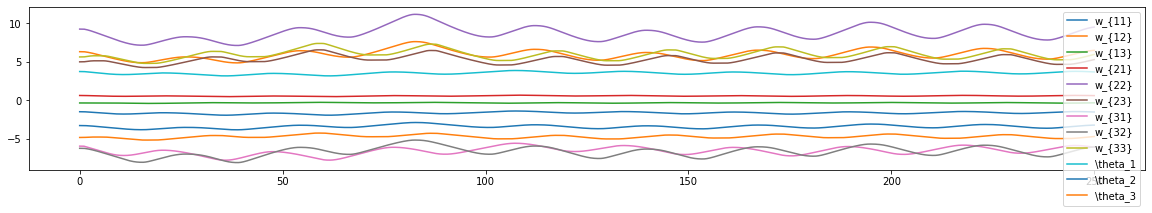

magnitude= 0.8999999999999999
CTRNN params: [-1.45294059  6.33462674 -0.57484027  0.31172286  9.69379173  5.86331611
 -7.26760324 -6.07909897  7.28356361  3.80712812 -3.4258374  -4.45318738
  7.37470557  9.79376709  2.56164698]
0.7309769367704462


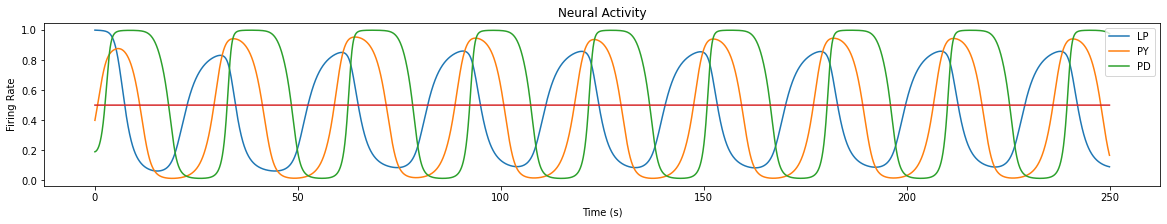

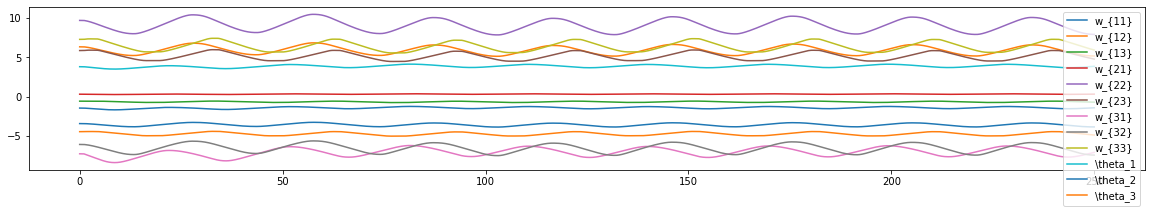

magnitude= 1.2
CTRNN params: [-1.0650776   5.12450663 -1.23655047 -0.0177977   8.43541475  4.27540896
 -7.27668248 -7.24225113  6.07022799  4.45643709 -4.07816293 -5.08630919
  7.37470557  9.79376709  2.56164698]
0.7303377872702709


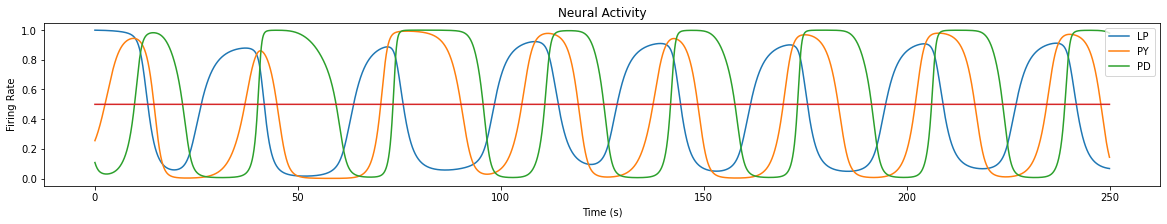

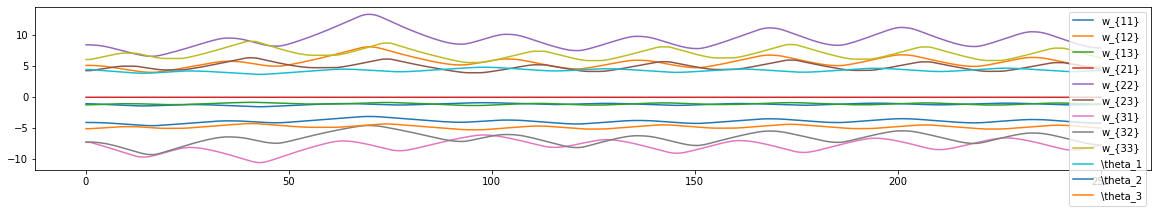

magnitude= 1.5
CTRNN params: [-0.66848348  6.30761403 -1.63850379 -0.42409543 11.42633881  4.48820499
 -7.68585837 -5.59355025  7.49678988  5.14981674 -3.89050296 -4.93930701
  7.37470557  9.79376709  2.56164698]
0.7333487838078623


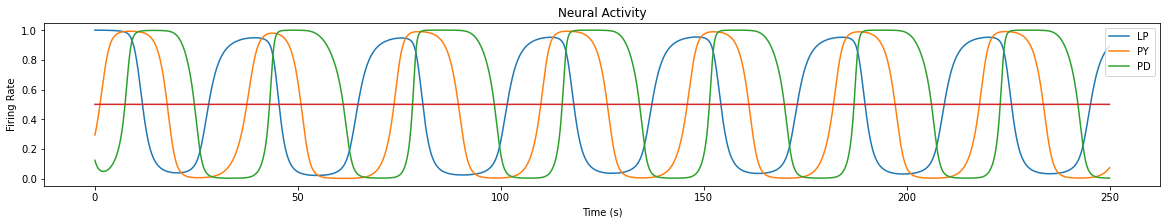

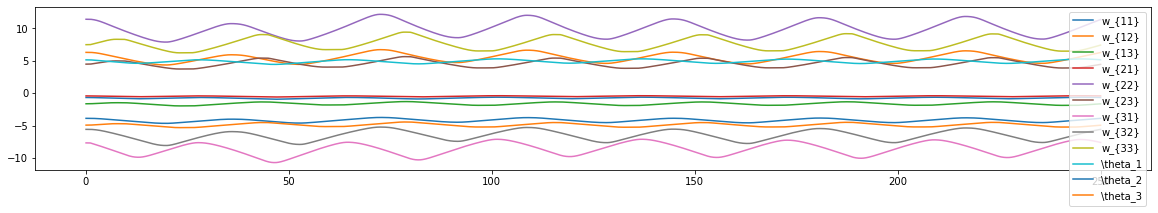

magnitude= 1.8
CTRNN params: [ -0.20170936   5.00852871  -1.99086644  -1.35685119   9.88109686
   4.84372419 -11.60064225  -6.82339996   9.65258912   5.25487778
  -4.71311257  -4.72570635   7.37470557   9.79376709   2.56164698]
0.7452280484219298


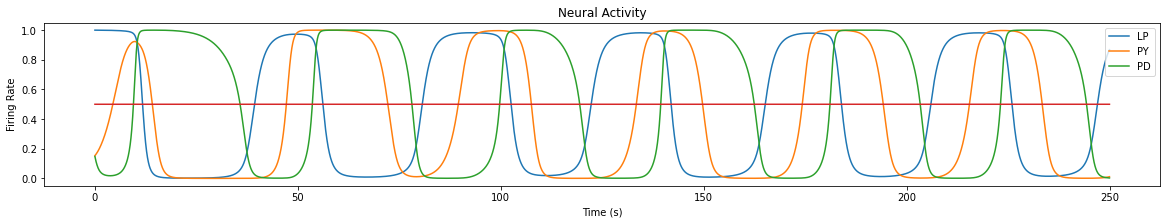

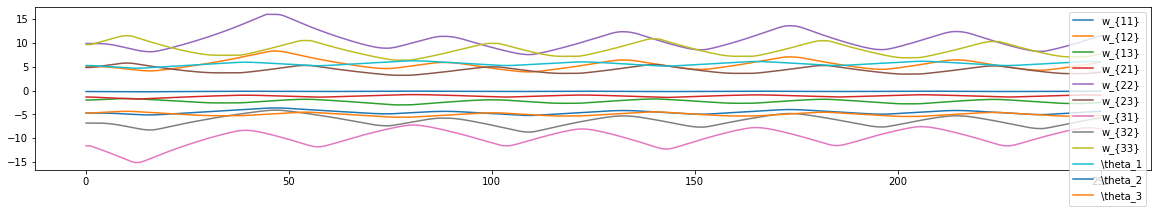

In [4]:
print('HP mech:', HPgenome)

pertvector = np.array([ 0.2919818 , -0.19653026, -0.3824069  ,-0.28102191 , 0.17555101, -0.15973807,
 -0.16450977, -0.1198932,   0.47956992,  0.50142158, -0.26209938 ,-0.05508989])
toppertmagnitude = 1
pts = 3
duration = 250

#how far can you push this one in the global pert direction?
fitness = pyloriclike(neurongenome,HPgenome)
i = 0
while fitness > .3:
    i += .3 #steps to increase the magnitude of the perturbation vector
    neurongenome[:len(pertvector)] += (i*pertvector)
    fitness = pyloriclike(neurongenome,HPgenome)
    print('magnitude=',i)
    print("CTRNN params:", neurongenome)
    print(fitness)
    C = CTRNN(n,dt,duration,HPgenome,neurongenome)
    C.initializeState(initial_states)
    C.resetStepcount()
    for t in range(len(C.time)):        #run the CTRNN for the allotted duration
        C.ctrnnstep(1)
    C.plot()
    plt.show()
    C.plotparams()
    plt.show()

In [1]:
#print('HP mech:', HPgenome)

print('No HP mechanism')

pertvector = np.array([ 0.2919818 , -0.19653026, -0.3824069  ,-0.28102191 , 0.17555101, -0.15973807,
 -0.16450977, -0.1198932,   0.47956992,  0.50142158, -0.26209938 ,-0.05508989])
toppertmagnitude = 1
pts = 3

#how far can you push this one in the global pert direction?
fitness = pyloriclike(neurongenome)
i = 0
while fitness > .3:
    i += .3 #steps to increase the magnitude of the perturbation vector
    neurongenome[:len(pertvector)] += (i*pertvector)
    fitness = pyloriclike(neurongenome)
    print('magnitude=',i)
    print("CTRNN params:", neurongenome)
    print(fitness)

No HP mechanism


NameError: name 'np' is not defined

magnitude= 3.2999999999999994
CTRNN params: [-0.69923634  5.43517587 -1.24168775  0.01536136  9.04629154  4.46479874
 -6.14979777 -7.06044348  6.65177225  5.02092644 -4.05489831 -5.02369556
  7.37470557  9.79376709  2.56164698]
0.6151926749211647


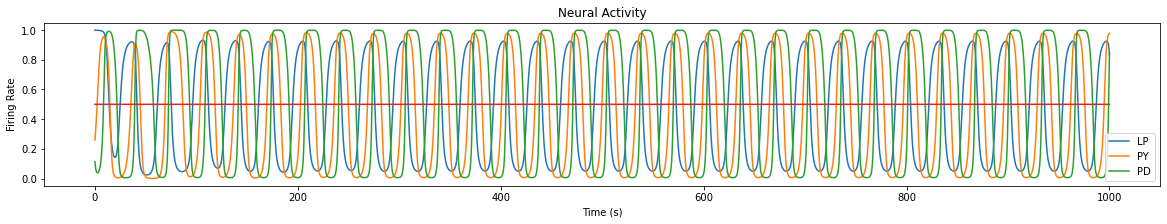

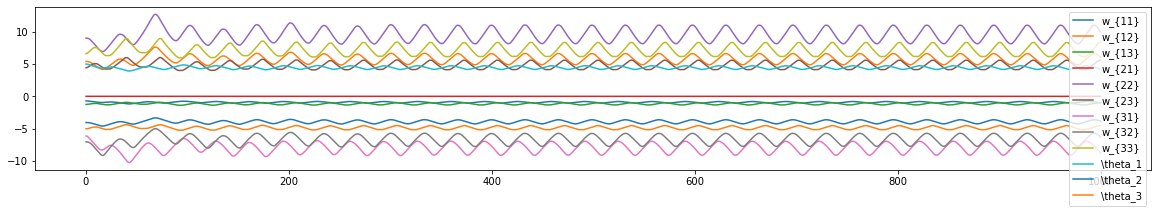

In [17]:
neurongenome[:len(pertvector)] += (3.3*pertvector)
fitness = pyloriclike(neurongenome) #trying it without HP
print('magnitude=',i)
print("CTRNN params:", neurongenome)
print(fitness)
C = CTRNN(n,dt,duration,HPgenome,neurongenome)
C.initializeState(initial_states)
C.resetStepcount()
for i in range(len(C.time)):        #run the CTRNN for the allotted duration
    C.ctrnnstep(1)
C.plot()
plt.show()
C.plotparams()
plt.show()

In [ ]:
#Plot trajectories through par space?

In [7]:
print(C.ctrnn_record[:,-1])
print(HPgenome)
print(acceptance(HPgenome,neurongenome))
print(pyloriclike(neurongenome,HPgenome))

[0.49875746 0.06276357 0.04340091]
[ 0.35847261  0.20945884  0.34201794  0.36847261  0.21945883  0.82836489
 39.9910632  19.0137781  40.        ]
outputs= [0.76218556 0.43502751 0.04011566]
rhos= [-0.59899647 -0.18962072  0.8984657 ]
0
0.7383403366556447
